# Predicting Co2 Emission by car with Simple Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Course era\ML\Linear Reg\FuelConsumptionCo2.csv")

In [3]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
#Feature selection : creating new dataframe with selected features
new_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


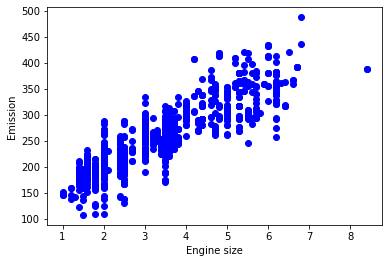

In [5]:
plt.scatter(new_df.ENGINESIZE, new_df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [6]:
x = new_df[['ENGINESIZE']]
y = new_df['CO2EMISSIONS']

In [7]:
#Train-Test Split using Sklearn
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [8]:
#Model building (LinearRegression)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [9]:
lr.coef_

array([38.97851563])

In [10]:
lr.intercept_

125.67366828432066

### Ploting best fit line

Text(0, 0.5, 'Emission')

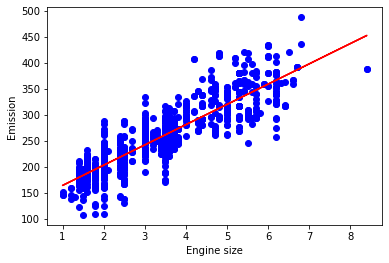

In [11]:
plt.scatter(new_df['ENGINESIZE'], new_df['CO2EMISSIONS'],  color='blue')
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, 'red')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### The regression metrics which can be used to evaluate the performance of a regression model.
* R2 Score
* MSE (Mean Squared Error)
* RMSE (Root Mean Squared Error)


In [12]:
#R2-score , MSE , RMSE
from sklearn.metrics import r2_score ,mean_squared_error, mean_squared_error
print("R2 Score: ",r2_score(y_test, lr_pred))
print("MSE : ",mean_squared_error(y_test, lr_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, lr_pred)))

R2 Score:  0.7617333793008167
MSE :  970.2759132903358
RMSE :  31.149252210772826
